<a href="https://colab.research.google.com/github/ahmedelsayed16112002/Projects/blob/main/Ridge%2C_Lasso_%26_Elastic_Net_(diabetes_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization Techniques in Linear Regression

In machine learning, regularization techniques are used to reduce overfitting and improve the generalization of models. Regularization adds a penalty to the cost function, discouraging complex models with large coefficients. In this section, we’ll cover three common regularization techniques used in linear regression: **Ridge Regression**, **Lasso Regression**, and **Elastic Net Regression**.

## 1. Ridge Regression (L2 Regularization)

Ridge regression, also known as **L2 regularization**, adds a penalty to the least squares loss function by shrinking the coefficients. The penalty is proportional to the square of the magnitude of the coefficients, which helps reduce the model’s complexity and mitigate multicollinearity.

### Formula:
\[
\min_{\beta} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} X_{ij} \beta_j \right)^2 + \lambda_1 \sum_{j=1}^{p} \beta_j^2
\]

- The first term represents the ordinary least squares (OLS) loss, which minimizes the difference between the predicted and actual values.
- The second term is the **L2 penalty**, which shrinks the magnitude of the coefficients \(\beta_j\).
- **Effect:** This reduces overfitting by penalizing large coefficients but **keeps all variables** in the model (no feature selection).

---

## 2. Lasso Regression (L1 Regularization)

Lasso regression, also known as **L1 regularization**, adds a penalty to the least squares loss function that is proportional to the **absolute value** of the coefficients. This regularization technique not only shrinks the coefficients but can also set some coefficients to **zero**, effectively removing certain features from the model.

### Formula:
\[
\min_{\beta} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} X_{ij} \beta_j \right)^2 + \lambda_2 \sum_{j=1}^{p} |\beta_j|
\]

- The first term is the ordinary least squares (OLS) loss.
- The second term is the **L1 penalty**, which encourages sparsity by shrinking some coefficients to zero.
- **Effect:** Performs feature selection by eliminating less important variables, leading to a simpler, more interpretable model.

---

## 3. Elastic Net Regression

Elastic Net regression combines both **L1 (Lasso)** and **L2 (Ridge)** regularization, balancing the benefits of both methods. It has two parameters, \(\lambda_1\) and \(\lambda_2\), which control the strength of the penalties.

### Formula:
\[
\min_{\beta} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} X_{ij} \beta_j \right)^2 + \lambda_1 \sum_{j=1}^{p} \beta_j^2 + \lambda_2 \sum_{j=1}^{p} |\beta_j|
\]

- The first term represents the ordinary least squares (OLS) loss.
- The second term is the **L2 penalty** (Ridge), which shrinks coefficients.
- The third term is the **L1 penalty** (Lasso), which encourages sparsity.
- **Effect:** Elastic Net provides a balance between Ridge and Lasso, making it a good choice when dealing with highly correlated features.

### Special Cases:
- When **\(\lambda_1 > 0\) and \(\lambda_2 = 0\)**, Elastic Net reduces to **Ridge Regression**.
- When **\(\lambda_1 = 0\) and \(\lambda_2 > 0\)**, Elastic Net reduces to **Lasso Regression**.
- When **\(\lambda_1 > 0\) and \(\lambda_2 > 0\)**, it combines both Ridge and Lasso effects.

---

## Key Differences

| Regression Type  | Regularization Term          | Effect on Coefficients     | Feature Selection? |
|------------------|-----------------------------|----------------------------|--------------------|
| **Ridge** (L2)   | \( \lambda_1 \sum \beta_j^2 \) | Shrinks coefficients       | ❌ No |
| **Lasso** (L1)   | \( \lambda_2 \sum |\beta_j| \) | Shrinks, some to zero      | ✅ Yes |
| **Elastic Net**  | \( \lambda_1 \sum \beta_j^2 + \lambda_2 \sum |\beta_j| \) | Shrinks, some to zero      | ✅ Yes |

---

These regularization techniques help to improve the performance and interpretability of linear regression models, especially when dealing with high-dimensional data or multicollinearity. By adjusting the values of \(\lambda_1\) and \(\lambda_2\), we can control the trade-off between bias and variance, leading to better generalization on unseen data.

Let’s dive deeper into each of these techniques with examples and their applications in machine learning.


## Important Resources

For a deeper understanding of regularization, L1 and L2 norms, and their effects on models, check out the following resource:

- [Visualizing Regularization and the L1 and L2 Norms](http://medium.com/towards-data-science/visualizing-regularization-and-the-l1-and-l2-norms-d962aa769932) - A comprehensive article on the topic, offering visualizations and insights into regularization techniques.


Difference between Elastic Net and Lasso in handling correlation
Lasso (L1) tends to select one feature from a group of correlated features and shrink the others to zero. This can be problematic because it ignores useful features.
Elastic Net (L1 + L2) avoids this issue by using the L2 penalty, which allows multiple correlated features to stay in the model with reduced but nonzero coefficients.
So, Elastic Net is better when features are strongly correlated because it keeps related features instead of dropping them randomly like Lasso does.

Soft selection instead of hard selection

Lasso (L1 alone) picks one feature and shrinks others to exactly zero because the absolute value function encourages sparsity.
Elastic Net blends L1 and L2, meaning it still prefers sparse solutions but not as aggressively as Lasso.
Grouping effect

One key feature of Elastic Net is that it tends to keep groups of correlated features together, rather than selecting just one.
This happens because L2 encourages small but nonzero coefficients for correlated variables instead of eliminating them.

R² (Coefficient of Determination):
R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
Good R²:
Close to 1: A value near 1 indicates a very good fit, meaning the model explains most of the variance in the target variable.
0.7 and above: Generally considered good in many real-world scenarios.
Bad R²:
Close to 0: Indicates a very poor fit, meaning the model explains almost none of the variance in the target variable.
Negative R²: Occurs when the model performs worse than simply predicting the mean of the target variable (i.e., the model doesn't even fit the data).
MSE (Mean Squared Error):
MSE measures the average squared difference between actual and predicted values. The lower the MSE, the better the model's performance.
Good MSE:
Closer to 0: A smaller MSE indicates that the model's predictions are close to the true values, so lower values are better.
Bad MSE:
High MSE: A high MSE means large errors in predictions. What counts as "high" depends on the scale of your target variable.

In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [39]:
import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')

# load the dataset

In [40]:
from sklearn.datasets import load_diabetes
df = load_diabetes()
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [41]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# Data processing

In [42]:
X = df.data
y = df.target

In [43]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model¶


In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_training = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Training R2 Score:', r2_score(y_train, y_pred_training))
print('Testing R2 Score:', r2_score(y_test, y_pred_test))

Training R2 Score: 0.5539250081377072
Testing R2 Score: 0.33223321731061806


In [46]:
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

MSE: 2993.081310469331


In [47]:
lr.coef_


array([ -1.69095299, -11.56618382,  26.76787514,  14.52941617,
       -31.5215625 ,  15.42097273,   1.17718013,   8.10153224,
        34.80044394,   2.04677265])

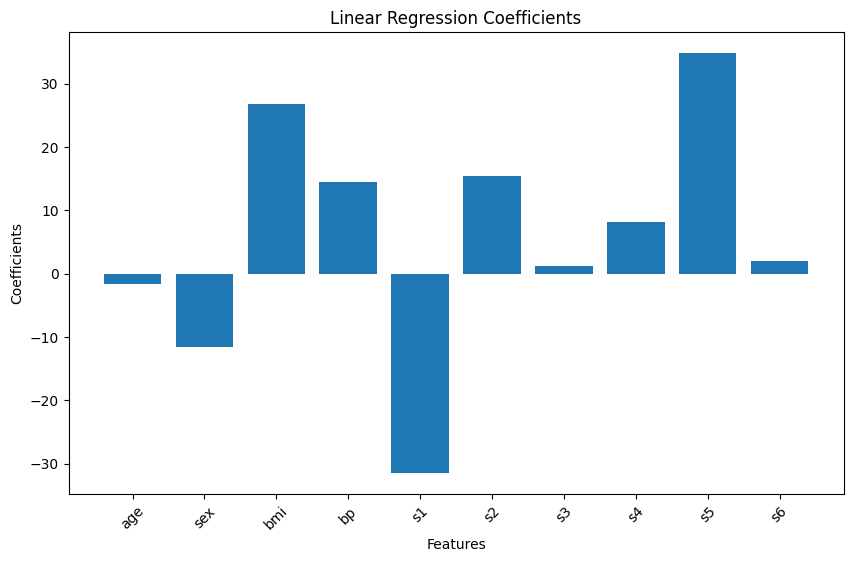

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(df.feature_names, lr.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

# 2.4 Ridge Regression¶


In [49]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred_tra  = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)


In [50]:
print('Training R2 Score:', r2_score(y_train, ridge_pred_tra))
print('Testing R2 Score:', r2_score(y_test, ridge_pred_test))


Training R2 Score: 0.5537818217533376
Testing R2 Score: 0.33106342873379846


In [51]:
mse = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

MSE: 2993.6392915869556


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's1'),
  Text(5, 0, 's2'),
  Text(6, 0, 's3'),
  Text(7, 0, 's4'),
  Text(8, 0, 's5'),
  Text(9, 0, 's6')])

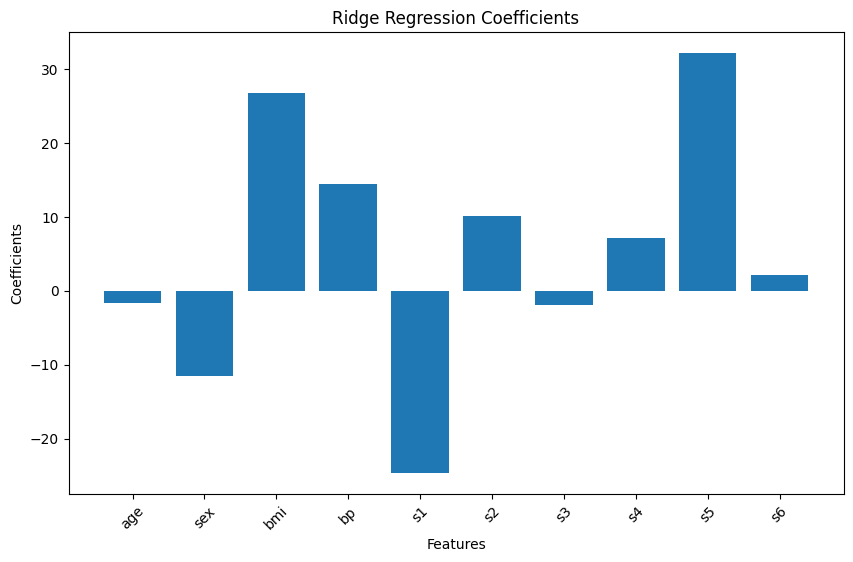

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(df.feature_names, ridge.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.xticks(rotation=45)

# 2.5 Ridge Regression with GridSearchCV¶


In [53]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y)
ridge_regressor.best_params_

{'alpha': 0.01}

In [54]:
ridge_regressor_train = ridge_regressor.predict(X_train)
print('Training R2 Score:', r2_score(y_train, ridge_regressor_train))

ridge_regressor_test = ridge_regressor.predict(X_test)
print('Testing R2 Score:', r2_score(y_test, ridge_regressor_test))

Training R2 Score: 0.5516133132973464
Testing R2 Score: 0.3566492338345896


In [55]:
mse = cross_val_score(ridge_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

MSE: 3002.829023569161


#  Lasso Regression¶


In [56]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred_tra  = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)
print('Training R2 Score:', r2_score(y_train, lasso_pred_tra))
print('Testing R2 Score:', r2_score(y_test, lasso_pred_test))

Training R2 Score: 0.5504972050568253
Testing R2 Score: 0.3343586610242273


In [57]:
mse = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

MSE: 2994.0754367613144


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's1'),
  Text(5, 0, 's2'),
  Text(6, 0, 's3'),
  Text(7, 0, 's4'),
  Text(8, 0, 's5'),
  Text(9, 0, 's6')])

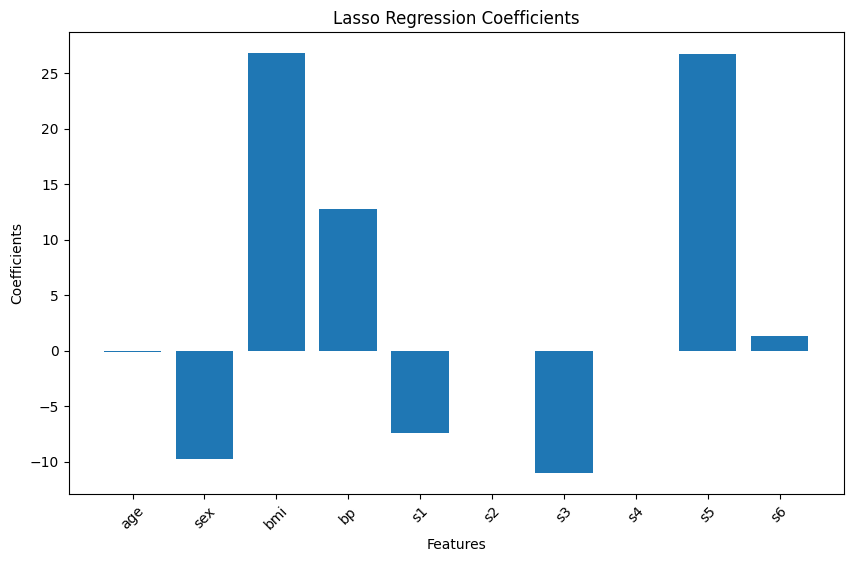

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(df.feature_names, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.xticks(rotation=45)

# 2.7 Lasso Regression with GridSearchCV¶


In [59]:
param = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X, y)
lasso_regressor.best_params_

{'alpha': 1}

In [60]:
lasso_regressor_train = lasso_regressor.predict(X_train)
print('Training R2 Score:', r2_score(y_train, lasso_regressor_train))

lasso_regressor_test = lasso_regressor.predict(X_test)
print('Testing R2 Score:', r2_score(y_test, lasso_regressor_test))

Training R2 Score: 0.5468247485460189
Testing R2 Score: 0.3537177789876116


In [61]:
mse = cross_val_score(lasso_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

MSE: 3006.7392542777184


# 2.8 Elastic Net Regression¶


In [62]:
elestic =  ElasticNet()
elestic.fit(X_train, y_train)
elestic_pred_tra  = elestic.predict(X_train)
elestic_pred_test = elestic.predict(X_test)

print('Training R2 Score:', r2_score(y_train, elestic_pred_tra))
print('Testing R2 Score:', r2_score(y_test, elestic_pred_test))

Training R2 Score: 0.5192262848796967
Testing R2 Score: 0.35694981646970236


In [63]:
mse = cross_val_score(elestic, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

MSE: 3139.5926251283336


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'bmi'),
  Text(3, 0, 'bp'),
  Text(4, 0, 's1'),
  Text(5, 0, 's2'),
  Text(6, 0, 's3'),
  Text(7, 0, 's4'),
  Text(8, 0, 's5'),
  Text(9, 0, 's6')])

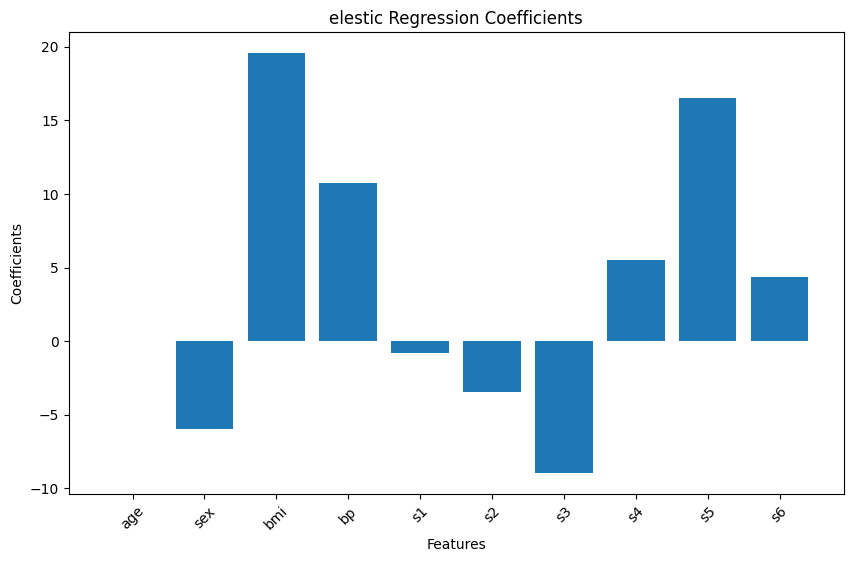

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(df.feature_names, elestic.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('elestic Regression Coefficients')
plt.xticks(rotation=45)

#  Elastic Net Regression with GridSearchCV¶


In [65]:
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
enet_regressor = GridSearchCV(elestic, parameters, scoring='neg_mean_squared_error', cv=10)
enet_regressor.fit(X, y)
enet_regressor.best_params_

{'alpha': 0.01}

In [ ]:
enet_regressor_tra = enet_regressor.predict(X_train)
print('Training R2 Score:', r2_score(y_train, enet_regressor_tra))


enet_regressor_test = enet_regressor.predict(X_test)
print('Testing R2 Score:', r2_score(y_test, enet_regressor_test))


mse = cross_val_score(enet_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
mse_avg = -np.mean(mse)
print('MSE:', mse_avg)

Training R2 Score: 0.5514559091824043
Testing R2 Score: 0.3542544398526638


## Conclusion

### Linear Regression
- **Training accuracy:** 0.55393  
- **Testing accuracy:** 0.33222  

### Ridge Regression
- **Training accuracy:** 0.55379  
- **Testing accuracy:** 0.33105  

### Ridge Regression with GridSearchCV
- **Training accuracy:** 0.55126  
- **Testing accuracy:** 0.33448  

### Lasso Regression
- **Training accuracy:** 0.5505  
- **Testing accuracy:** 0.33435  

### Lasso Regression with GridSearchCV
- **Training accuracy:** 0.5505  
- **Testing accuracy:** 0.33435  

### Elastic Net Regression
- **Training accuracy:** 0.51923  
- **Testing accuracy:** 0.35694  

### Elastic Net Regression with GridSearchCV
- **Training accuracy:** 0.55358  
- **Testing accuracy:** 0.33047  

From the scores mentioned above, we see that **Elastic Net Regression** performs well. It reduces overfitting while increasing the testing accuracy.


# 🎯 What I Learned from This Notebook  

## 🔹 1. Understanding Ridge, Lasso, and Elastic Net Regularization  
✔ **Ridge Regression (L2 Regularization):**  
   - Shrinks coefficients but **retains all features**.  
   - Helps handle multicollinearity by distributing weights smoothly.  

✔ **Lasso Regression (L1 Regularization):**  
   - Shrinks some coefficients **to zero**, effectively performing **feature selection**.  
   - Useful when some features are irrelevant or redundant.  

✔ **Elastic Net (L1 + L2 Regularization):**  
   - **Balances** between Ridge and Lasso.  
   - Avoids Lasso’s over-shrinkage while still selecting important features.  

---

## 🔹 2. Using Cross-Validation to Optimize Mean Squared Error (MSE)  
📌 **Why Cross-Validation?**  
- Splits data into **multiple folds** to evaluate model performance.  
- Helps prevent **overfitting** and ensures generalization to new data.  
- The model is selected based on the **lowest Mean Squared Error (MSE)**.  

📌 **How It Works:**  
1. Divide data into **K folds**.  
2. Train on **K-1 folds** and validate on the remaining fold.  
3. Repeat the process for all folds and take the **average error**.  

---

## 🔹 3. Using Grid Search with Cross-Validation to Choose the Best Alpha  
📌 **Why Use Grid Search?**  
- Automates the search for the **best hyperparameter (alpha)**.  
- Ensures we select the value that **minimizes error** and improves model performance.  

📌 **How It Works:**  
1. Define a range of **alpha** values.  
2. Use **GridSearchCV** to test multiple values with **cross-validation**.  
3. Pick the **optimal alpha** that results in the **best MSE**.  

📌 **Final Goal:**  
✅ A **well-tuned, high-performing model** that generalizes well to unseen data. 🚀  
